### Bigger apartment's squaremeter per price expensive than small ones

## H0
Apartment size and price of squaremeter are independent

## H1
Apartment size and price of squaremeter are dependent

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [11]:
data = pd.read_csv('house_prices_fixed.csv',decimal=',')

In [12]:
data['price_category'] = list(map(lambda x: 'expensive' if x > 83405 else 'cheap',data['price_per_squaremeter']))

In [13]:
data['area'].describe()

count    236.000000
mean      51.313559
std       21.914320
min       19.000000
25%       35.000000
50%       44.500000
75%       64.125000
max      135.000000
Name: area, dtype: float64

In [14]:
data['area_category'] = list(map(lambda x: 
                                  'very big' if x > 64.125 else (
                                  'big' if x > 44.50 else (
                                  'average' if x > 35 else 
                                      'small'))
                                  ,data['area']))

In [15]:
data['price_category'].describe()

count       236
unique        2
top       cheap
freq        133
Name: price_category, dtype: object

In [16]:
data.head(10)

,address,area,date,demanded_price,final_price,monthly_fee,operating_cost,price_per_squaremeter,room_number,title,url,year_of_construction,price_category,area_category
0,Luxgatan 7,30.0,13/01/21,2350000,2550000,1733,6096.0,85000,1 rum,Luxgatan 7 - Sald - Lilla Essingen \\\\ Kungs...,https://www.hemnet.se/salda/lagenhet-1rum-lill...,1937,expensive,small
1,"Primusgatan 108, 6/6 tr",101.0,10/01/21,11400000,11400000,5887,5540.0,112871,4 rum,"Primusgatan 108, 6/6 tr - Sald - Kungsholmen ...",https://www.hemnet.se/salda/lagenhet-4rum-kung...,1935,expensive,very big
2,"Stralgatan 47, 3 tr",31.0,08/01/21,2595000,2875000,2471,3200.0,92742,2 rum,"Stralgatan 47, 3 tr - Sald - Lilla Essingen ...",https://www.hemnet.se/salda/lagenhet-2rum-lill...,1939,expensive,small
3,Disponentgatan 1,46.0,08/01/21,3550000,3550000,3003,12979.0,77174,"2,5 rum","Disponentgatan 1 - Sald - Lilla Essingen, STO...","https://www.hemnet.se/salda/lagenhet-2,5rum-li...",1935,cheap,big
4,Essinge Brogata 12,34.5,08/01/21,2495000,2900000,2162,4200.0,84058,2 rum,Essinge Brogata 12 - Sald - Kungsholmen - Lil...,https://www.hemnet.se/salda/lagenhet-2rum-kung...,1934,expensive,small
5,"Essinge Brogata 39, 2 tr",23.0,14/12/20,1895000,2205000,1787,3600.0,95870,1 rum,"Essinge Brogata 39, 2 tr - Sald - Lilla Essi...",https://www.hemnet.se/salda/lagenhet-1rum-lill...,1938,expensive,small
6,Stralgatan 47,40.0,11/12/20,2595000,2850000,2957,4860.0,71250,2 rum,Stralgatan 47 - Sald - Lilla Essingen \\\\ Ku...,https://www.hemnet.se/salda/lagenhet-2rum-lill...,1939,cheap,average
7,"Patentgatan 1, 3tr",69.0,04/12/20,5995000,6400000,3778,7200.0,92754,3 rum,"Patentgatan 1, 3tr - Sald - Lilla Essingen, S...",https://www.hemnet.se/salda/lagenhet-3rum-lill...,2006,expensive,very big
8,"Primusgatan 82, 6tr",84.5,03/12/20,8495000,8495000,4828,7800.0,100533,3 rum,"Primusgatan 82, 6tr - Sald - Lilla Essingen, ...",https://www.hemnet.se/salda/lagenhet-3rum-lill...,2004,expensive,very big
9,"Primusgatan 81, van 4",96.0,01/12/20,8495000,9250000,4793,6860.0,96354,4 rum,"Primusgatan 81, van 4 - Sald - Lilla Essingen...",https://www.hemnet.se/salda/lagenhet-4rum-lill...,2004,expensive,very big


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address                236 non-null    object 
 1   area                   236 non-null    float64
 2   date                   236 non-null    object 
 3   demanded_price         236 non-null    int64  
 4   final_price            236 non-null    int64  
 5   monthly_fee            236 non-null    int64  
 6   operating_cost         205 non-null    float64
 7   price_per_squaremeter  236 non-null    int64  
 8   room_number            236 non-null    object 
 9   title                  236 non-null    object 
 10  url                    236 non-null    object 
 11  year_of_construction   236 non-null    int64  
 12  price_category         236 non-null    object 
 13  area_category          236 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 25.9+ KB


In [22]:
data_crosstab = pd.crosstab(data['area_category'],  data['price_category'], margins = False)

In [23]:
data_crosstab

price_category,cheap,expensive
area_category,,
average,42,15
big,42,16
small,14,48
very big,35,24


In [24]:
contigency_pct = pd.crosstab(data['area_category'],  data['price_category'], normalize='index')

In [25]:
contigency_pct

price_category,cheap,expensive
area_category,,
average,0.736842,0.263158
big,0.724138,0.275862
small,0.225806,0.774194
very big,0.593220,0.406780


<AxesSubplot:xlabel='price_category', ylabel='area_category'>

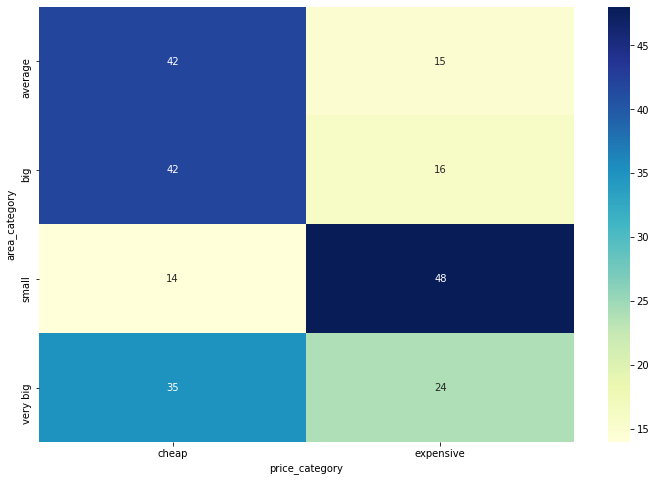

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(data_crosstab, annot=True, cmap="YlGnBu")

In [38]:
stat, p, dof, expected = chi2_contingency(data_crosstab)

In [40]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)
